In [1]:
import pandas as pd
from pandas import Series, DataFrame

# 1. 시계열 데이터 기초

## 1.1 시계열 데이터 타입(datetime)

In [2]:
import datetime as dt

In [3]:
dt.datetime(2021,3,2)

datetime.datetime(2021, 3, 2, 0, 0)

In [4]:
now=dt.datetime.now()
now

datetime.datetime(2021, 7, 18, 13, 42, 4, 266494)

In [5]:
#타임존 지정해서 날짜 생성
dt.datetime(2021,3,2,13,50,tzinfo=dt.timezone.utc)

datetime.datetime(2021, 3, 2, 13, 50, tzinfo=datetime.timezone.utc)

In [7]:
dt.datetime.now(tz=dt.timezone.utc)

datetime.datetime(2021, 7, 18, 4, 43, 45, 985189, tzinfo=datetime.timezone.utc)

In [9]:
now.astimezone(dt.timezone.utc)

datetime.datetime(2021, 7, 18, 4, 42, 4, 266494, tzinfo=datetime.timezone.utc)

## 1.2 timedelta 를 활용한 시간 계산

In [10]:
#시간계산 편하게 해줌
from datetime import timedelta

In [11]:
#현재 시간 기준으로 100일 뒤의 날짜
now + timedelta(days=100)

datetime.datetime(2021, 10, 26, 13, 42, 4, 266494)

In [12]:
#현재시간 기준으로 1시간 25분 후의 시간
now + timedelta(hours=1,minutes=25)

datetime.datetime(2021, 7, 18, 15, 7, 4, 266494)

In [13]:
#두 날짜 간의 차이 계산
dt1=dt.datetime(2021,3,2,9,30)
dt2=dt.datetime(2023,5,18,13,15)

In [15]:
diff=dt2-dt1
diff

datetime.timedelta(days=807, seconds=13500)

In [16]:
#시간
diff.seconds//3600

3

In [17]:
#분
diff.seconds/60%60

45.0

## 1.3 시계열 데이터 처리

In [19]:
import random
sample = DataFrame()
sample['date'] = pd.date_range(start = '20210101', periods=500).tolist()
sample['count'] = random.sample(range(1,1000), 500)

In [22]:
sample

,date,count
0,2021-01-01,734
1,2021-01-02,104
2,2021-01-03,690
3,2021-01-04,699
4,2021-01-05,194
...,...,...
495,2022-05-11,111
496,2022-05-12,140
497,2022-05-13,176
498,2022-05-14,804


In [23]:
# 7월달 데이터만 조회 #1 
# 조건 색인 활용
sample[(sample.date>='2021-07-01') & (sample.date<='2021-07-31')]


,date,count
181,2021-07-01,985
182,2021-07-02,814
183,2021-07-03,534
184,2021-07-04,728
185,2021-07-05,805
186,2021-07-06,988
187,2021-07-07,345
188,2021-07-08,880
189,2021-07-09,442
190,2021-07-10,874


In [24]:
# 7월달 데이터만 조회 #2
# isin() 함수 활용
sample[sample.date.isin(pd.date_range(start='2021-07-01',end='2021-07-31'))]

,date,count
181,2021-07-01,985
182,2021-07-02,814
183,2021-07-03,534
184,2021-07-04,728
185,2021-07-05,805
186,2021-07-06,988
187,2021-07-07,345
188,2021-07-08,880
189,2021-07-09,442
190,2021-07-10,874


In [27]:
# 7월달 데이터마 조회 #3
# datetimeIndex 활용
sample2 = sample.set_index('date')

- datetimeIndex 색인

In [29]:
# 2021년 데이터 선택
sample2['2021']

<ipython-input-29-7f5269286fb3>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  sample2['2021']


,count
date,
2021-01-01,734
2021-01-02,104
2021-01-03,690
2021-01-04,699
2021-01-05,194
...,...
2021-12-27,448
2021-12-28,71
2021-12-29,569


In [30]:
# 2021년 3월 2일부터 2021년 3월 28일까지 데이터 선택
sample2['2021-03-02':'2021-03-28']

,count
date,
2021-03-02,631
2021-03-03,801
2021-03-04,410
2021-03-05,522
2021-03-06,654
2021-03-07,558
2021-03-08,249
2021-03-09,462
2021-03-10,311


In [31]:
# 2021년 4월 28일 데이터 선택
sample2.loc['2021-04-28']

count    123
Name: 2021-04-28 00:00:00, dtype: int64

## 1-4 strptime()으로 문자열을 날짜 타입으로 변환하기

In [33]:
문자열 = '21/08/11'

In [34]:
# 21년 8월 11일로 변환 
dt.datetime.strptime(문자열,'%y/%m/%d')

datetime.datetime(2021, 8, 11, 0, 0)

In [35]:
# 11년 8월 21일로 변환
dt.datetime.strptime(문자열,'%d/%m/%y')

datetime.datetime(2011, 8, 21, 0, 0)

In [38]:
# 8월 11일 21시로 변환
dt1 = dt.datetime.strptime(문자열,'%H/%m/%d')

In [39]:
#dt1의 year 2021로 업데이트
dt1.replace(year=2021)

datetime.datetime(2021, 8, 11, 21, 0)

##### [실습] 아래 df에서 2020년 7월 데이터만 선택하기

In [40]:
df = DataFrame({'date':['2020-07-01','2020-07-02', '2020-07-05', '2020-07-10', '2020-07-23', 
                        '2020-07-24','2020-07-28', '2020-08-05', '2020-08-10', '2020-08-23'],
                'value':random.sample(range(1, 100), 10)
})
df

,date,value
0,2020-07-01,83
1,2020-07-02,9
2,2020-07-05,8
3,2020-07-10,44
4,2020-07-23,62
5,2020-07-24,75
6,2020-07-28,57
7,2020-08-05,63
8,2020-08-10,97
9,2020-08-23,4


In [ ]:
# 위에서 배운대로 해도 정상적으로 동작하지 않음


In [41]:
# 해결책. df의 date컬럼의 타입을 datetime으로 변환
#1.strptime 활용
df['date2']=df.date.apply(lambda X: dt.datetime.strptime(X,'%Y-%m-%d'))

In [43]:
df['date3']=pd.to_datetime(df.date,format='%Y-%m-%d')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    10 non-null     object        
 1   value   10 non-null     int64         
 2   date2   10 non-null     datetime64[ns]
 3   date3   10 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 448.0+ bytes


In [47]:
# 7월 데이터만 조회
df.set_index('date2').loc['2020-07']

,date,value,date3
date2,,,
2020-07-01,2020-07-01,83,2020-07-01
2020-07-02,2020-07-02,9,2020-07-02
2020-07-05,2020-07-05,8,2020-07-05
2020-07-10,2020-07-10,44,2020-07-10
2020-07-23,2020-07-23,62,2020-07-23
2020-07-24,2020-07-24,75,2020-07-24
2020-07-28,2020-07-28,57,2020-07-28


## 1.5 strftime()으로 날짜 타입의 변수를 문자열로 변환하기

In [52]:
# now 변수를 4자리년도-월-일 형식으로 출력
dt.datetime.strftime(now,'%Y-%m-%d')

'2021-07-18'

In [56]:
# 실습 - now 변수를 월-일 시:분 형식으로 출력
now.strftime('m-%d %H:%M')

'm-18 13:42'

* Tip. Week와 요일 정보 얻기(strftime)

In [133]:
# 심화 - Week와 요일 정보 얻기
# 참고 사이트 : https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

# %U : week number (sunday to monday) (e.g. 00, 01, ...53)
# %V : ISO 8601 week number (monday to sunday) (e.g. 01, 02, ... 53)
...
# %a : weekday (Sun, Mon, ..) 
# %w : weekday (0,1,2,3,...) (0 = Sunday)

Ellipsis

In [58]:
df.drop(['date2','date3'],axis=1,inplace=True)

In [60]:
df['date']=pd.to_datetime(df.date)

##### [실습 #2] df에  week number(%U), weekday(%a) 컬럼 추가

In [64]:
now.strftime('%V')

'28'

In [66]:
now.strftime('%w')

'0'

In [69]:
#df에  week number(%V), weekday(%w) 컬럼 추가
df['weekNumber']=df.date.apply(lambda X: X.strftime('%V'))
df['weekDay']=df.date.apply(lambda X: X.strftime('%a'))

##### [실습 #3-1] 주차별 value 컬럼의 합 구하기

In [70]:
df

,date,value,weekNumber,weekDay
0,2020-07-01,83,27,Wed
1,2020-07-02,9,27,Thu
2,2020-07-05,8,27,Sun
3,2020-07-10,44,28,Fri
4,2020-07-23,62,30,Thu
5,2020-07-24,75,30,Fri
6,2020-07-28,57,31,Tue
7,2020-08-05,63,32,Wed
8,2020-08-10,97,33,Mon
9,2020-08-23,4,34,Sun


##### [실습 #3-2] 요일별 value 컬럼의 평균 구하기

In [71]:
df.pivot_table(index='weekNumber',aggfunc='sum',values='value')

,value
weekNumber,
27,100
28,44
30,137
31,57
32,63
33,97
34,4


## 2. 시계열 데이터 응용 - Covid-19 현황 분석

#### 1. Covid-19 데이터 가져오기
- https://github.com/owid/covid-19-data/tree/master/public/data : 매일 업데이트된 파일을 제공함

In [72]:
covid=pd.read_excel('data/owid-covid-data.xlsx')

In [73]:
covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [74]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70851 entries, 0 to 70850
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               70851 non-null  object 
 1   continent                              67325 non-null  object 
 2   location                               70851 non-null  object 
 3   date                                   70851 non-null  object 
 4   total_cases                            69938 non-null  float64
 5   new_cases                              69936 non-null  float64
 6   new_cases_smoothed                     68935 non-null  float64
 7   total_deaths                           60914 non-null  float64
 8   new_deaths                             61072 non-null  float64
 9   new_deaths_smoothed                    68935 non-null  float64
 10  total_cases_per_million                69555 non-null  float64
 11  ne

##### 2. date 컬럼을 datetime으로 변경하기

In [75]:
covid.date=pd.to_datetime(covid.date,format='%Y-%m-%d')

#### 3. 간단하게 분석하기 위해 데이터 범위 좁히기
- United States, Brazil, France, South Korea 데이터만 선택

In [79]:
covid = covid[covid.location.isin(['United States', 'Brazil', 'France', 'South Korea'])]

In [80]:
covid

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
9104,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765
9105,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765
9106,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765
9107,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765
9108,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67543,USA,North America,United States,2021-02-19,28006110.0,106355.0,73405.286,495827.0,2689.0,1898.857,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
67544,USA,North America,United States,2021-02-20,28077620.0,71510.0,71194.714,497648.0,1821.0,1850.429,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
67545,USA,North America,United States,2021-02-21,28134115.0,56495.0,69986.000,498897.0,1249.0,1872.286,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926
67546,USA,North America,United States,2021-02-22,28190159.0,56044.0,70281.286,500310.0,1413.0,1937.857,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926


- location, date, total_cases, new_cases 컬럼만 선택

In [81]:
covid=covid[['location', 'date', 'total_cases', 'new_cases']]

In [82]:
covid

,location,date,total_cases,new_cases
9104,Brazil,2020-02-26,1.0,1.0
9105,Brazil,2020-02-27,1.0,0.0
9106,Brazil,2020-02-28,1.0,0.0
9107,Brazil,2020-02-29,2.0,1.0
9108,Brazil,2020-03-01,2.0,0.0
...,...,...,...,...
67543,United States,2021-02-19,28006110.0,106355.0
67544,United States,2021-02-20,28077620.0,71510.0
67545,United States,2021-02-21,28134115.0,56495.0
67546,United States,2021-02-22,28190159.0,56044.0


#### 4. 데이터 분석 실습
- [실습 #1] 각 나라별로 월별 누적 확진자수의 합 구하기
- [실습 #2] 각 나라별로 요일별 신규 확진자수의 합 구하기
- [실습 #3] 각 나라별로 분기별 신규 확진자수의 합 구하기
...

##### 년도(year), 달(month), 일(day), 주차(WeekNumber, %U)과 요일(weekDay, %a), 분기(quarter) 컬럼 추가하기

In [88]:
covid['year']=covid.date.apply(lambda X: X.strftime('%Y'))
covid['month']=covid.date.apply(lambda X: X.strftime('%m'))
covid['day']=covid.date.apply(lambda X: X.strftime('%d'))
covid['weekNumber']=covid.date.apply(lambda X: X.strftime('%U'))
covid['weekDay']=covid.date.apply(lambda X: X.strftime('%a'))

<ipython-input-88-39267763da6d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid['year']=covid.date.apply(lambda X: X.strftime('%Y'))
<ipython-input-88-39267763da6d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid['month']=covid.date.apply(lambda X: X.strftime('%m'))
<ipython-input-88-39267763da6d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

In [92]:
#쿼터(분기) 정보 추가
covid['quarter']=covid.date.apply(lambda X: pd.Timestamp(X).quarter)

<ipython-input-92-81cccfa9bbbe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid['quarter']=covid.date.apply(lambda X: pd.Timestamp(X).quarter)


- [실습 #1] 각 나라별로 월별 누적 확진자수의 합 구하기
 - 월별 마지막 날 기준으로 누적 확진자수 구하기
 - https://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries-offset-aliases 참고

In [85]:
#매월 마지막 날짜데이터만 선택
ex1 =covid[covid.date.isin(pd.date_range(start=covid.date.min(),
                                   end=covid.date.max(),
                                   freq='M'))]

<AxesSubplot:xlabel='date'>

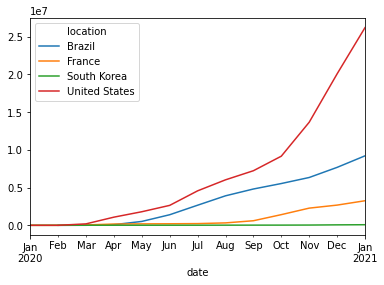

In [86]:
ex1.set_index(['date','location']).unstack()['total_cases'].plot()

In [95]:
covid

,location,date,total_cases,new_cases,year,month,day,weekNumber,weekDay,quarter
9104,Brazil,2020-02-26,1.0,1.0,2020,02,26,08,Wed,1
9105,Brazil,2020-02-27,1.0,0.0,2020,02,27,08,Thu,1
9106,Brazil,2020-02-28,1.0,0.0,2020,02,28,08,Fri,1
9107,Brazil,2020-02-29,2.0,1.0,2020,02,29,08,Sat,1
9108,Brazil,2020-03-01,2.0,0.0,2020,03,01,09,Sun,1
...,...,...,...,...,...,...,...,...,...,...
67543,United States,2021-02-19,28006110.0,106355.0,2021,02,19,07,Fri,1
67544,United States,2021-02-20,28077620.0,71510.0,2021,02,20,07,Sat,1
67545,United States,2021-02-21,28134115.0,56495.0,2021,02,21,08,Sun,1
67546,United States,2021-02-22,28190159.0,56044.0,2021,02,22,08,Mon,1


- [실습 #2] 각 나라별로 요일별 신규 확진자수의 합 구하기

In [97]:
covid.pivot_table(index='weekDay',aggfunc='sum',values='new_cases')

,new_cases
weekDay,
Fri,6754862.0
Mon,4810652.0
Sat,6307617.0
Sun,4892651.0
Thu,6766153.0
Tue,6278893.0
Wed,6486294.0


- [실습 #3] 각 나라별로 분기별 신규 확진자수의 합 구하기

<AxesSubplot:xlabel='year,quarter'>

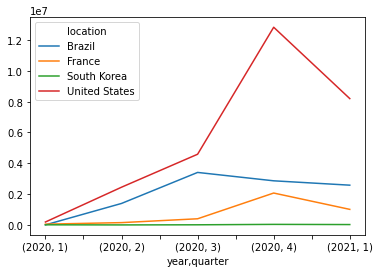

In [101]:
covid.pivot_table(index=['year','quarter'],columns='location',
                  aggfunc='sum',values='new_cases').plot()